# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()


In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation            # FC
from keras.layers import Conv2D, MaxPooling2D,Flatten # CNN

from tensorflow.keras.utils import to_categorical

# ------------------- seed 고정 -----------------------
np.random.seed(1024)
tf.random.set_seed(1024)

# data

In [3]:
# api에는 tensorflow.keras 쓰도록 되어있지만 keras가 떨어져 나와서 tensorflow 없어도 됨.
from keras.datasets import mnist # toydataset. 누구나 거쳐가는 데이터

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # keras에서 load_data는 train, test set 나눠서 한다.

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# X데이터 가공

In [6]:
# X_train = X_train.reshape(X_train.shape[0], 784) # 784=28*28
# X_test = X_test.reshape(X_test.shape[0], 784) # 784=28*28

In [7]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

# y label 평준화
y_label : integers in range 0-9

<pre>
* ML : arr.LabelEncoder() 글->숫, arr.OneHotEncoder() 1 0 0 0 ... df.get_dummies() 결측처리, 글->숫, 원핫

In [8]:
y_train=to_categorical(y=y_train, num_classes=10, dtype='int32') # class 숫자 찍어줘야함
y_test=to_categorical(y=y_test, num_classes=10, dtype='int32')

# Model

<img src='https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg' width=700>

In [15]:
model=Sequential()

# ------------------------------- CNN --------------------------------------
model.add(Conv2D(16, kernel_size=(5,5), input_shape=(28,28,1), activation='relu')) # 필터는 자동 생성.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())


# -------------------------------FC(Affine) --------------------------------------
model.add(Dense(units=64 , activation='relu')) # ,input_dim=784 이제 이것도 필요 없다. 위에서 받아오기 때문데
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=16 , activation='relu'))
model.add(Dense(units=10 , activation='softmax')) # 다중분류 예측(0~9)



# model.add(Dense(units=10 , activation='sigmoid')) # 내가 쓴 것. 다중분류????? to_categorical 하면 0~1 맞추는 거 아닌가

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)               

In [17]:
model.compile(loss='categorical_crossentropy', # logloss라고 써도 된다.
             optimizer='adam',
             metrics='accuracy')

In [18]:
res=model.fit(X_train,y_train,
              batch_size=128,   # 128바이트씩 끊어서 읽어라
              validation_split=0.1,
              # validation_data=(X_test,y_test),
              epochs=30
                )

Epoch 1/30
422/422 [==============================] - 11s 24ms/step - loss: 0.9587 - accuracy: 0.8026 - val_loss: 0.2017 - val_accuracy: 0.9425
Epoch 2/30
422/422 [==============================] - 9s 22ms/step - loss: 0.1673 - accuracy: 0.9532 - val_loss: 0.1175 - val_accuracy: 0.9690
Epoch 3/30
422/422 [==============================] - 9s 21ms/step - loss: 0.1040 - accuracy: 0.9710 - val_loss: 0.0845 - val_accuracy: 0.9792
Epoch 4/30
422/422 [==============================] - 9s 21ms/step - loss: 0.0762 - accuracy: 0.9782 - val_loss: 0.0816 - val_accuracy: 0.9783
Epoch 5/30
422/422 [==============================] - 9s 21ms/step - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.0895 - val_accuracy: 0.9782
Epoch 6/30
422/422 [==============================] - 9s 22ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0716 - val_accuracy: 0.9823
Epoch 7/30
422/422 [==============================] - 9s 22ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0611 - val_accuracy: 0.984

# test 데이터 예측

In [19]:
# 한 번도 안 보여준 데이터 맞춰봐
loss_cateforical_crossentropy, metrics_accuracy = model.evaluate(X_test, y_test) 

313/313 [==============================] - 2s 5ms/step - loss: 0.0541 - accuracy: 0.9873


# 평가 시각화

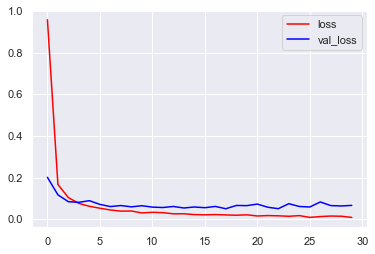

In [20]:
plt.plot(np.arange(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

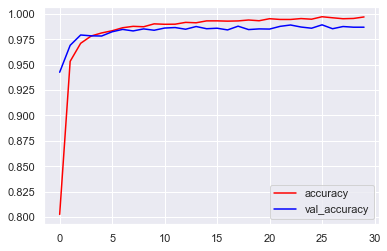

In [21]:
# 빨간 선과 파란 선 벌어져야 오버핏인데 별로 안 벌어진다.
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='accuracy')
plt.plot(np.arange(len(res.history['val_accuracy'])), res.history['val_accuracy'], c='blue', label='val_accuracy')
plt.legend()
plt.show()

# 오답 확인(검증)

In [ ]:
proba=model.predict(X_test)
print(proba[:2])

In [ ]:
proba[0].max()

In [ ]:
proba.shape[0]

In [ ]:
pred_list=[]
for i in range(proba.shape[0]):
    pred_list.append(np.argmax(proba[i])) # np.argmax: 가장 큰 값을 가지고 있는 인덱스 리턴 

In [ ]:
pred_s=pd.Series(pred_list, name='pred')

In [ ]:
real_list=[]
for i in range(y_test.shape[0]):
    real_list.append(np.argmax(y_test[i]))

In [ ]:
real_s=pd.Series(real_list, name='real')

In [ ]:
df=pd.concat([pred_s, real_s], axis=1)

In [ ]:
df[df['pred']!=df['real']].index

In [ ]:
df[df['pred']!=df['real']]

In [ ]:
X_test.shape

In [ ]:
X_test_temp=X_test.reshape(10000,28,28)

In [ ]:
p, axes = plt.subplots(2,5,figsize=(10,5))
for n, idx in enumerate(df[df['pred']!=df['real']].index[:10]):
    row=n//5
    col=n%5
    # print(num, n,idx,row,col)
    axes[row,col].imshow(X_test_temp[idx]) #, cmap=plt.get_cmap('gray'))
    axes[row,col].set_title((df.iloc[idx, 0], df.iloc[idx, 1]))
plt.show()

In [ ]:
# proba=model.predict(X_test)

In [ ]:

pred_list=[]
for i in range(proba.shape[0]):
    pred_list.append(np.argmax(proba[i])) # np.argmax: 가장 큰 값을 가지고 있는 인덱스 리턴 
    
pred_s=pd.Series(pred_list, name='pred')

real_list=[]
for i in range(y_test.shape[0]):
    real_list.append(np.argmax(y_test[i]))
    
real_s=pd.Series(real_list, name='real')

df=pd.concat([pred_s, real_s], axis=1)

df[df['pred']!=df['real']].index

df[df['pred']!=df['real']]

X_test.shape

X_test_temp=X_test.reshape(10000,28,28)

p, axes = plt.subplots(2,5,figsize=(10,5))
for n, idx in enumerate(df[df['pred']!=df['real']].index[:10]):
    row=n//5
    col=n%5
    # print(num, n,idx,row,col)
    axes[row,col].imshow(X_test_temp[idx]) #, cmap=plt.get_cmap('gray'))
    axes[row,col].set_title((df.iloc[idx, 0], df.iloc[idx, 1]))
plt.show()

### 강사님 -> 전체 코드 참고(아주 깔끔하다)

In [ ]:
# 예측값 꺼내기 더 간편한 버전
# for arr in proba:
#     print(np.argmax(arr))

In [ ]:
# proba = model.predict(X_test)
# print(len(proba), proba[:2])

# list=[]
# for arr in proba:
#     list.append(np.argmax(arr))

# ox_df = pd.DataFrame(dict형태로 어쩌고....)

In [ ]:
# for문 안에서 X_test[idx].reshape(28,28)해도 된다.
# set_title(f"{real} {pred}")이렇게 하면 깔끔